In [67]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

improve_χ_trace! (generic function with 1 method)

In [2]:
#gi, χ₀, χsp, χch, χsp_a, χch_a, χpp_a, U, β, shift = 
#    gen_synth(Nf, Nb, Nν_shell, shift)
Nν_shell = 10
testf = "../test/test_data/ED_s1.jld2"
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
n_iω = trunc(Int, size(χsp,3)/2);

# Spin Channel Tests

In [3]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += (U^2/2) * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - (U^2/2) * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-4.5,-3.0), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

In [4]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2/2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - U^2/2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-3.0,-1.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

In [5]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-1.5,-1.2), title="ν+ν'+ω, ω₁ test")

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

In [6]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
p = if ωi == 22
    heatmap(test, clim=(-1.3,-1.2), title="ν+ν'+ω, ω₀ test") #(-3.3,-2.7)
else
    heatmap(test, clim=(-3.3,-2.7), title="ν+ν'+ω, ω₀ test")
end
display(p)

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

# Charge Channel Test

In [7]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_ch, Fch_tr, χch_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

In [8]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_ch, Fch_tr, χch_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: BoundsError: attempt to access 400-element Vector{Int64} at index [401]

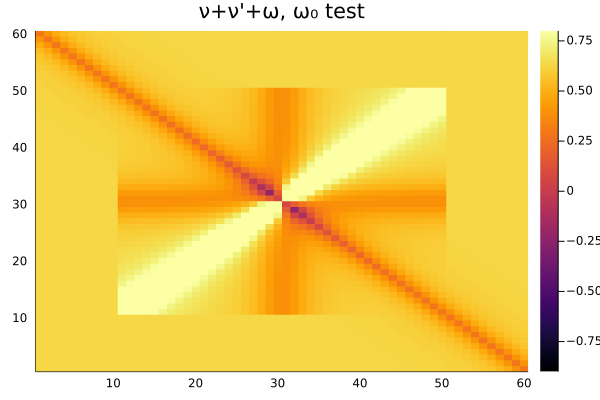

In [9]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.9,0.8), title="ν+ν'+ω, ω₀ test")

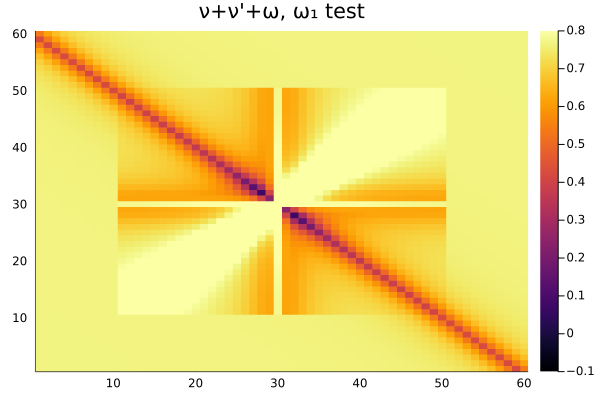

In [10]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.1,0.8), title="ν+ν'+ω, ω₁ test")

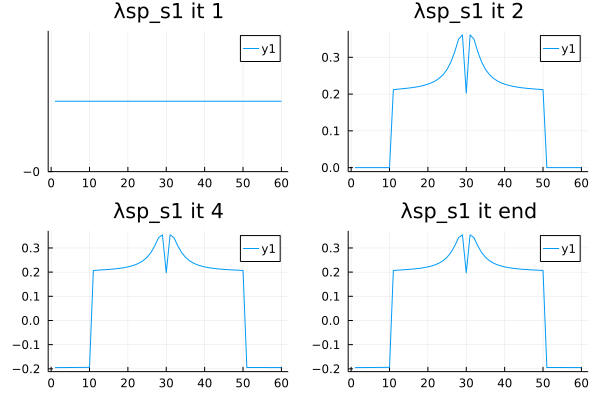

In [11]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λsp_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λsp_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λsp_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λsp_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

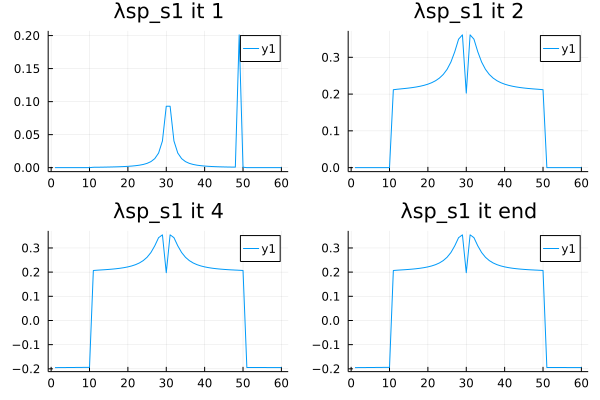

In [12]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

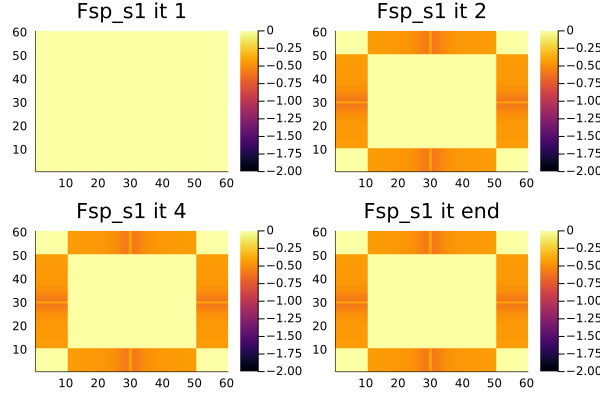

In [13]:
clim = (-2,0)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

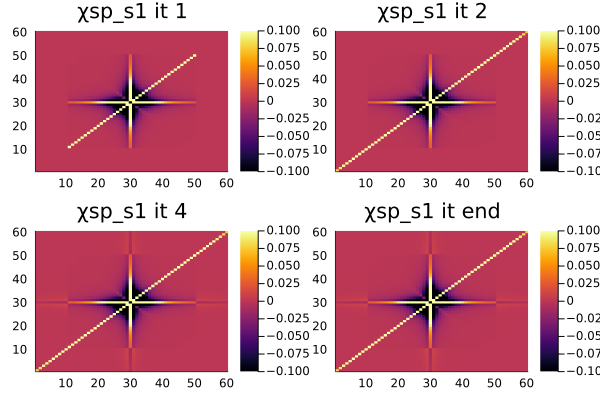

In [14]:
clim = (-0.1,0.1)
p1 = heatmap(real.(χsp_tr[1]), title="χsp_s1 it 1",clim=clim)
p2 = heatmap(real.(χsp_tr[2]), title="χsp_s1 it 2",clim=clim)
p3 = heatmap(real.(χsp_tr[4]), title="χsp_s1 it 4",clim=clim)
p4 = heatmap(real.(χsp_tr[end]), title="χsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

# Full Convergence Tests

In [ ]:
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_large.jld2"
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 151
i_sp, Fsp_tr, χsp_tr, χlocsp_tr, λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=50, atol=1e-19);
i_ch, Fch_tr, χch_tr, χlocch_tr, λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=50, atol=1e-19);
G = gImp[-150:149]
Fsp = zeros(300,300)
Fch = zeros(300,300)
res = zeros(size(Fsp,1))
for k in 1:size(F,1)
    for i in 1:size(F,3)
        for j in 1:size(F,2)
            for ii in 1:300
                for jj in 1:300
                δ_ννp = Float64(ii == jj)
                    Fsp[ii,jj] = - β^2 * (χsp[ii,jj] - δ_ννp*χ₀[i[1]])/(χ₀[i[1]]*χ₀[i[2]])
                end
            U*0.5*G[j]*G[j+i]*G[k+i]*(Fch[k,j,i]-Fsp[k,j,i])/(β^2)
        end
    end
end

Nν_shell = 20
using OffsetArrays
using JLD2
using Plots

testf = "../test/test_data/ED_out_large.jld2"
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 151
i_sp, Fsp_tr, χsp_tr, χlocsp_tr, λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=50, atol=1e-19);
i_ch, Fch_tr, χch_tr, χlocch_tr, λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=50, atol=1e-19);

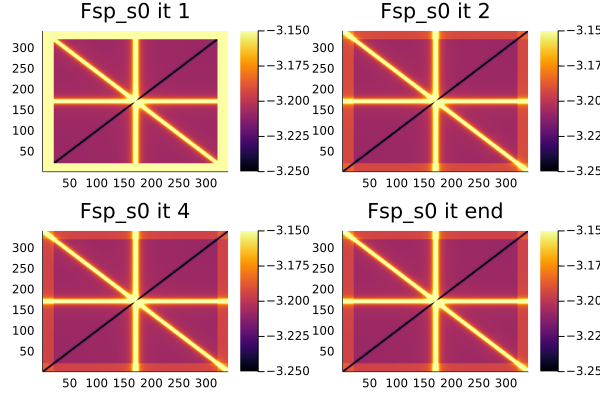

In [18]:
clim = (-3.25,-3.15)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

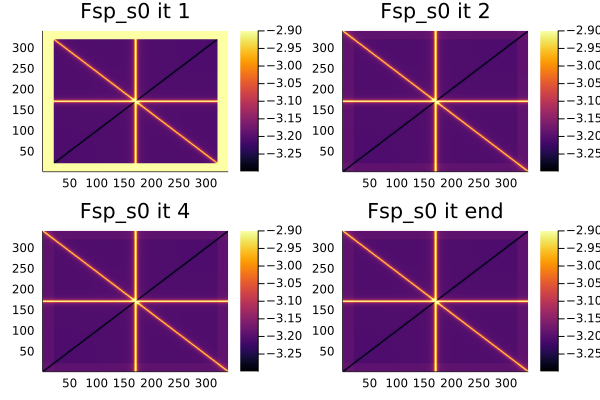

In [19]:
clim = (-3.3,-2.9)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

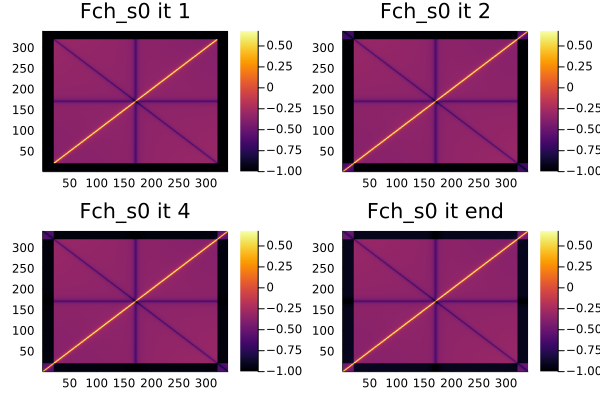

In [4]:
# χ_asympt only in corners
clim = (-1.0,0.68)
p1 = heatmap(real.(Fch_tr[1]) .- U, title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]) .- U, title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]) .- U, title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]) .- U, title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

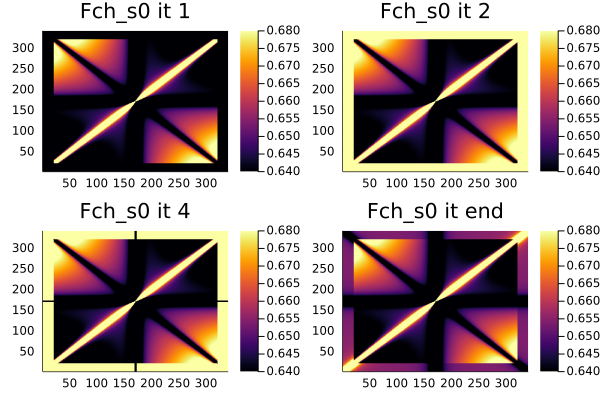

In [99]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

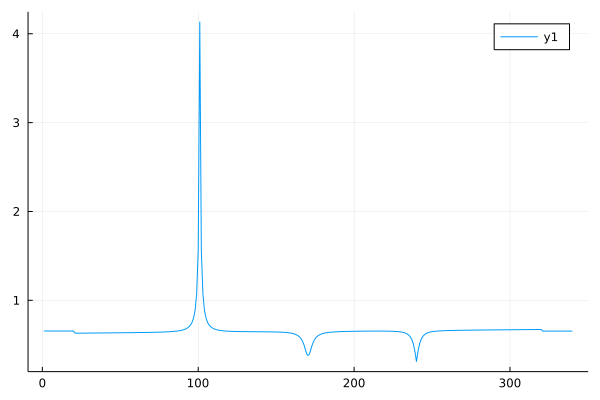

In [108]:
size(Fch_tr[end])
plot(real.(Fch_tr[end][171,:]))
pl_arr = zeros(size(Fch_tr[end],1))
for i in 10:length(pl_arr)
    pl_arr[i] = real(Fch_tr[end][i,end-i+10])
end
plot(real.(Fch_tr[end][101,:]))
#plot!(pl_arr)

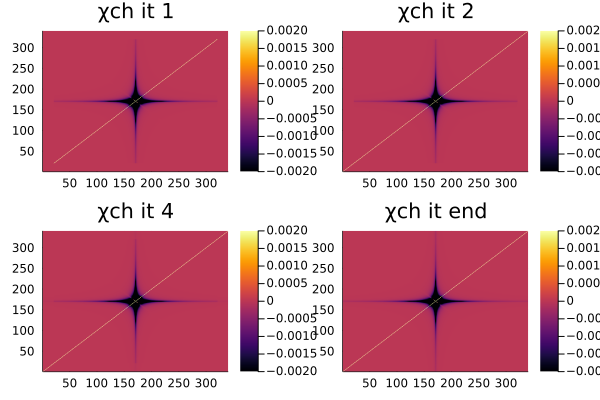

In [98]:
clim = (-0.002,0.002)
p1 = heatmap(real.(χch_tr[1]), title="χch it 1",clim=clim)
p2 = heatmap(real.(χch_tr[2]), title="χch it 2",clim=clim)
p3 = heatmap(real.(χch_tr[3]), title="χch it 4",clim=clim)
p4 = heatmap(real.(χch_tr[end]), title="χch it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

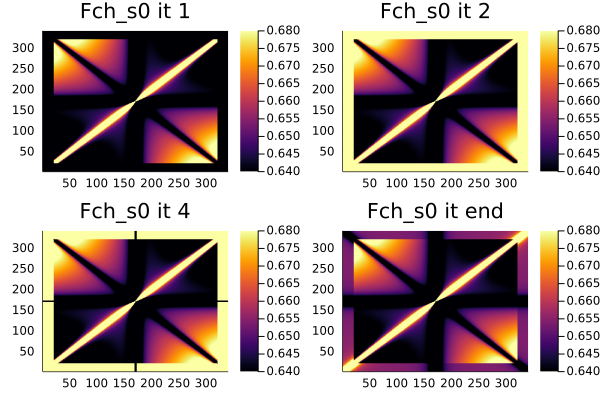

In [62]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

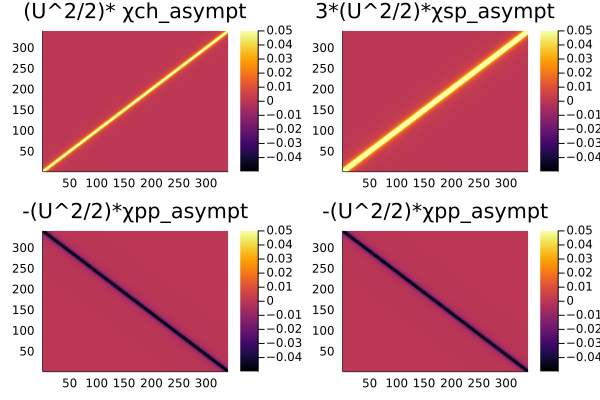

In [88]:
# everything treated equally in asympt
χch_a_pl = zeros(size(Fch_tr[1]))
χsp_a_pl = zeros(size(Fch_tr[1]))
χpp_a_pl = zeros(size(Fch_tr[1]))
I_all = union(helper.I_core, helper.I_asympt)
n_iω = trunc(Int,size(χsp,3)/2)
n_iν = trunc(Int,size(χsp,1)/2)
i1,i2 = aux_indices(I_all, ωi, n_iω, n_iν, shift)
for i in 1:length(I_all)
    ii = I_all[i]
    χch_a_pl[ii] = (U^2/2)*real(helper.χch_asympt[i1[i]])
    χsp_a_pl[ii] = 3*(U^2/2)*real(helper.χsp_asympt[i1[i]])
    χpp_a_pl[ii] = -(U^2/2)*real(helper.χpp_asympt[i2[i]])
end
clim = (-0.05,0.05)
p1 = heatmap(χch_a_pl, title="(U^2/2)* χch_asympt",clim=clim)
p2 = heatmap(χsp_a_pl, title="3*(U^2/2)*χsp_asympt",clim=clim)
p3 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p4 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p = plot(p1,p2,p3,p3, layout=(2,2))

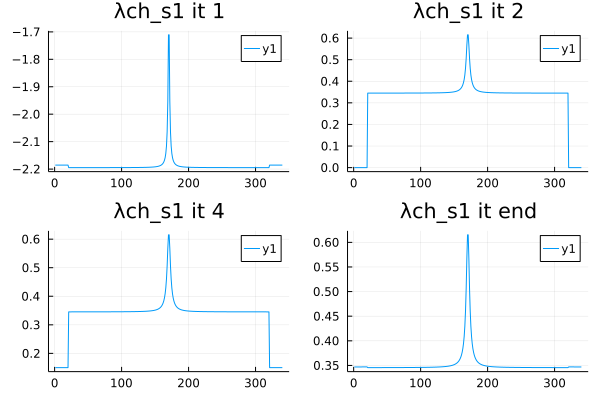

In [49]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λch_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λch_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[3]), title="λch_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λch_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

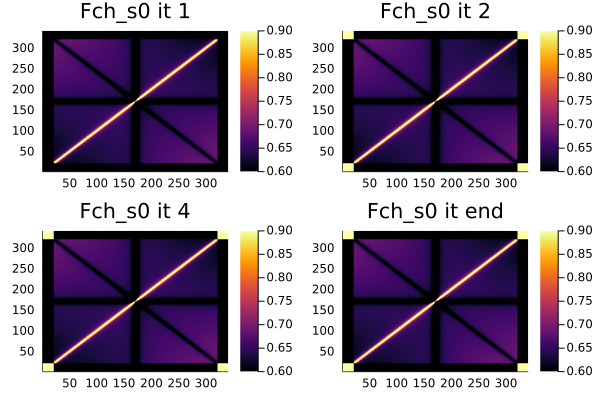

In [11]:
# \lambda only on sides
clim = (0.6,0.9)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

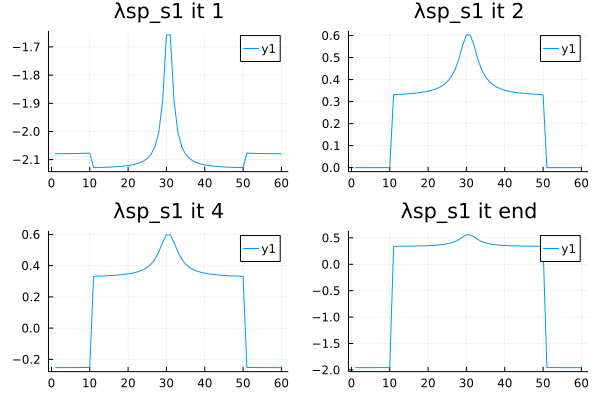

In [97]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [6]:
clim = (-0.01,0.01)
p11 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTch_impr_s0 not defined

In [22]:
clim = (-0.1,0.1)
p11 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTsp_impr_s0 not defined

In [1]:
include("../test/test_s0.jl")

non-shifted: 
#Iterations: sp: 3, ch: 3


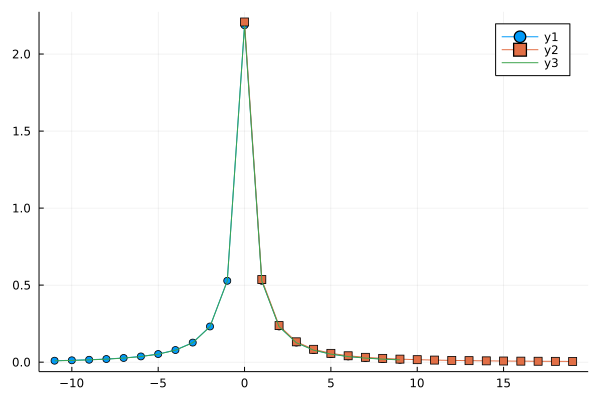

In [18]:
using Plots
χsp_res = real.(sum(χDMFTsp_impr_s0, dims=[1,2])[1,1,:])/β_s0^2
χch_res = real.(sum(χDMFTch_impr_s0, dims=[1,2])[1,1,:])/β_s0^2;
χsp_res_old = real.(sum(χDMFTsp_s0, dims=[1,2])[1,1,:])/β_s0^2
χch_res_old = real.(sum(χDMFTch_s0, dims=[1,2])[1,1,:])/β_s0^2;
plot(-11:9,χsp_res[140:160], markershape=:auto)
plot!(0:19,real.(helper_s0.χsp_asympt[1:20]), markershape=:auto)
plot!(-11:9,χsp_res_old[140:160])

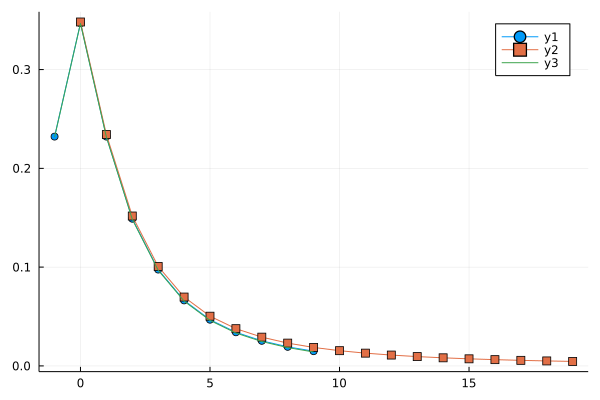

In [21]:
plot(-1:9,χch_res[150:160], markershape=:auto)
plot!(0:19,real.(helper_s0.χch_asympt[1:20]), markershape=:auto)
plot!(-1:9,χch_res_old[150:160])

In [5]:
imp_dens_s0 = 0.5*sum(real.(χDMFTsp_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTsp_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTsp_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTsp_impr_s1+χDMFTch_impr_s1))/β_s1^3
imp_dens_as_s0 = 0.5*real(sum(helper_s0.χch_asympt .+ helper_s0.χsp_asympt))/β_s0
imp_dens_as_s1 = 0.5*real(sum(helper_s1.χch_asympt .+ helper_s1.χsp_asympt))/β_s1
Ssp_impr_s0 = real(sum(χDMFTsp_impr_s0[:,:,21]))/β_s0^2
Ssp_naive_s0 = real(sum( χDMFTsp_s0[:,:,21]))/β_s0^2
Ssp_true_s0 =  real(χ_sp_asympt_s0[1])
Sch_impr_s0 = real(sum(χDMFTch_impr_s0[:,:,21]))/β_s0^2
Sch_naive_s0 = real(sum( χDMFTch_s0[:,:,21]))/β_s0^2
Sch_true_s0 = real(χ_ch_asympt_s0[1])
Ssp_impr_s1 = real(sum( χDMFTsp_impr_s1[:,:,151]))/β_s1^2
Ssp_naive_s1 = real(sum( χDMFTsp_s1[:,:,151]))/β_s1^2
Ssp_true_s1 = real(χ_sp_asympt_s1[1])
Sch_impr_s1 = real(sum( χDMFTch_impr_s1[:,:,151]))/β_s1^2
Sch_naive_s1 = real(sum( χDMFTch_s1[:,:,151]))/β_s1^2
Sch_true_s1 = real(χ_ch_asympt_s1[1])
println("                     s0 naiive      s0 improved      s1 naiive      s1 improved")
println(" n/2 (1 - n/2)     $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")
println(" n/2*(1 - n/2)(as) $(rpad(0.0,8))        $(round(imp_dens_as_s0,digits=8))      $(rpad(0.0,10))      $(round(imp_dens_as_s1,digits=8))      ")
println(" χsp(ω=0) true     $(rpad(0.0,8))        $(round(Ssp_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Ssp_true_s1,digits=8))      ")
println(" χsp(ω=0)          $(round(Ssp_naive_s0,digits=8))      $(round(Ssp_impr_s0,digits=8))       $(round(Ssp_naive_s1,digits=8))      $(round(Ssp_impr_s1,digits=8))      ")
println(" χch(ω=0) true     $(rpad(0.0,8))        $(round(Sch_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Sch_true_s1,digits=8))      ")
println(" χch(ω=0)          $(round(Sch_naive_s0,digits=8))       $(round(Sch_impr_s0,digits=8))      $(round(Sch_naive_s1,digits=8))      $(round(Sch_impr_s1,digits=8))      ")

LoadError: UndefVarError: χ_sp_asympt_s0 not defined

In [ ]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

In [22]:
# Full 
                     s0 naiive      s0 improved      s1 naiive      s1 improved
 n/2 (1 - n/2)     0.10655486      0.19323526      0.14269089      0.16116186      
 n/2*(1 - n/2)(as) 0.0             0.17063648      0.0             0.17063648      
 χsp(ω=0) true     0.0             2.20818564      0.0             2.20818564      
 χsp(ω=0)          2.02099022      2.1307242       2.18264899      2.18688092      
 χch(ω=0) true     0.0             0.34813023      0.0             0.34813023      
 χch(ω=0)          0.3366906       0.34346704      0.34667931      0.3469208 

 # no λ edges



LoadError: syntax: extra token "naiive" after end of expression

# Comparisons

In [245]:
test_06 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b06u1.jld2"
testc_06 = "/home/julian/Hamburg/ED_data/asympt_tests/config_06.toml"
test_10 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b10u1.jld2"
testc_10 = "/home/julian/Hamburg/ED_data/asympt_tests/config_10.toml"
test_14 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"
testc_14 = "/home/julian/Hamburg/ED_data/asympt_tests/config_14.toml"
test_18 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b18u1.jld2"
testc_18 = "/home/julian/Hamburg/ED_data/asympt_tests/config_18.toml"

using Plots
using OffsetArrays
using JLD2
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

using Printf
using Query
using SeriesAcceleration
using TOML
using TimerOutputs

_eltype = ComplexF64
include("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/Config.jl")
include("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl")
include("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/GFFit.jl")
include("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/helpers.jl")

filter_KZ (generic function with 1 method)

In [202]:
f = test_10
cf = testc_10
Nν_shell = 20
rsum(x) = sum_freq_full_f!(x, mP.β, sP)*(mP.β^ndims(x))

gImp, χ₀, χsp, χch, helper, U, β, shift = setup(f, Nν_shell);

χsp_impr = deepcopy(χsp)
χch_impr = deepcopy(χch)
χsp_impr_r = deepcopy(χsp)
χch_impr_r = deepcopy(χch)
χsp = real.(χsp)
χch = real.(χch)
mP, sP, env, kGrids = readConfig(cf);
χsp_ω_naiive = sum(χsp, dims=[1,2])[1,1,:]/β^2;
χch_ω_naiive = sum(χch, dims=[1,2])[1,1,:]/β^2;
χsp_ω_rOnly = mapslices(x->sum_freq_full_f!(x, mP.β, sP), χsp, dims=[1,2])[1,1,:];
χch_ω_rOnly = mapslices(x->sum_freq_full_f!(x, mP.β, sP), χch, dims=[1,2])[1,1,:];
for ωi in 1:size(χsp_impr,3)
    improve_χ!(:sp, ωi, view(χsp_impr,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=100, atol=1e-12);
    improve_χ!(:ch, ωi, view(χch_impr,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=100, atol=1e-12);
    improve_χ!(:sp, ωi, view(χsp_impr_r,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=100, atol=1e-12, sumf=rsum);
    improve_χ!(:ch, ωi, view(χch_impr_r,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=100, atol=1e-12, sumf=rsum);
end
χsp_ω_aOnly = real.(sum(χsp_impr, dims=[1,2])[1,1,:])/β^2;
χch_ω_aOnly = real.(sum(χch_impr, dims=[1,2])[1,1,:])/β^2;
χsp_ω_aPartR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χsp_impr), dims=[1,2])[1,1,:];
χch_ω_aPartR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χch_impr), dims=[1,2])[1,1,:];
χsp_ω_aFullR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χsp_impr_r), dims=[1,2])[1,1,:];
χch_ω_aFullR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χch_impr_r), dims=[1,2])[1,1,:];

┌ Info: Reading Inputs...
└ @ Main /home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:9
┌ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
└ @ Main /home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:94
┌ Warning: Frequency file not found, reconstructing grid from config.
└ @ Main /home/julian/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:103


In [203]:
sh_b_sp = get_sum_helper(50:150, sP, :f)
test_arr = [if n != 0.0 Float64(1/n^2) else 0.0 end for n in -100:100];
test_r = sum_freq_full_f!(test_arr, mP.β, sP)*mP.β
test_n = sum(test_arr)
test_t = 2*π^2/6
println("True:       $test_t\nNaive:      $test_n\nRichardson: $test_r")

True:       3.289868133696453
Naive:      3.269967800369786
Richardson: 3.289711516816169


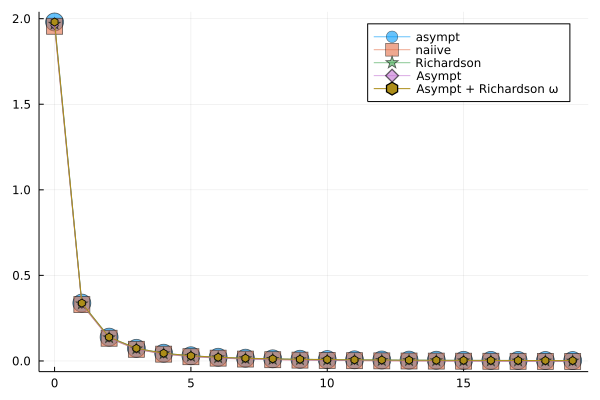

In [206]:
xr = 101:120
plot(0:19, real.(helper.χsp_asympt)[1:20], markersize=10, alpha=0.6, markershape=:auto, label="asympt")
plot!(xr .- 101, χsp_ω_naiive[xr],markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101,χsp_ω_rOnly[xr],markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101,χsp_ω_aOnly[xr],markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101,χsp_ω_aPartR[xr], markershape=:auto, label="Asympt + Richardson ω")
#plot!(xr .- 101,χsp_ω_aFullR[xr], markershape=:auto, label="Asympt + Richardson")

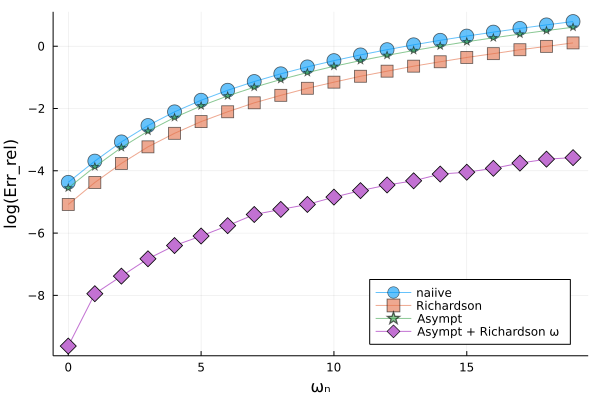

In [226]:
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
plot(xr .- 101, log.(err_rel_naiive), ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, log.(err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, log.(err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, log.(err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

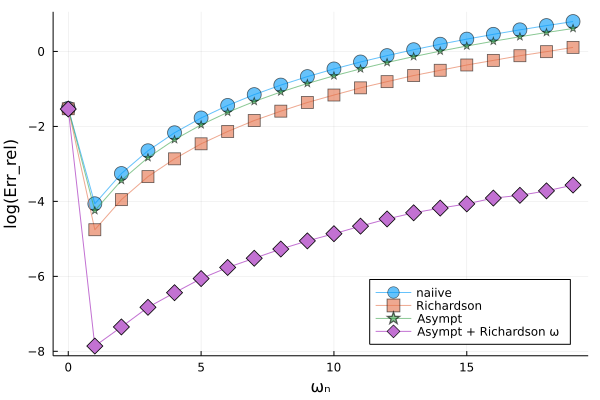

In [227]:
xr = 101:120
err_rel_naiive = abs.(χch_ω_naiive[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_rOnly = abs.(χch_ω_rOnly[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_aOnly = abs.(χch_ω_aOnly[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_aPartR = abs.(χch_ω_aPartR[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
plot(xr .- 101, log.(err_rel_naiive), ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, log.(err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, log.(err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, log.(err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

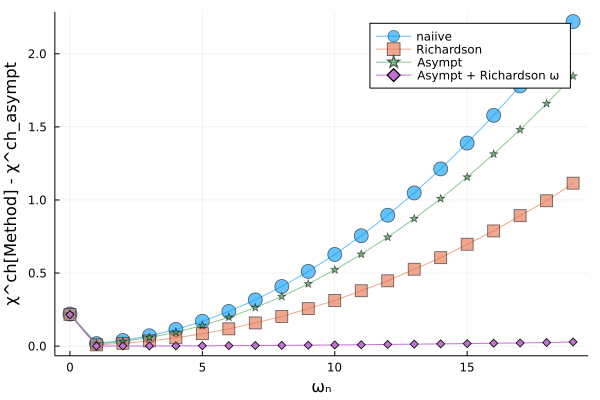

In [221]:
xr = 101:120
plot(xr .-  101,abs.(χch_ω_naiive[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20],ylabel="χ^ch[Method] - χ^ch_asympt", xlabel="ωₙ",markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101,abs.(χch_ω_rOnly[xr] .-  real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20],markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101,abs.(χch_ω_aOnly[xr] .-  real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20],markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101,abs.(χch_ω_aPartR[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20], markershape=:auto, label="Asympt + Richardson ω")

In [243]:
iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω) .* π ./ mP.β
χsp_a = zeros(length(-sP.n_iω:sP.n_iω))
χch_a = zeros(length(-sP.n_iω:sP.n_iω))
χsp_a[1:sP.n_iω+1] = real.(reverse(helper.χsp_asympt[1:sP.n_iω+1]))
χsp_a[sP.n_iω+2:end] = real.(helper.χsp_asympt[2:sP.n_iω+1])
χch_a[1:sP.n_iω+1] = real.(reverse(helper.χch_asympt[1:sP.n_iω+1]))
χch_a[sP.n_iω+2:end] = real.(helper.χch_asympt[2:sP.n_iω+1])
χupup_DMFT_ω = (χsp_a .+ χch_a)/2
χupup_DMFT_ω_sub = subtract_tail(χupup_DMFT_ω, mP.Ekin_DMFT, iωn)

test_naive_naive = sum(χsp_a .+ χch_a)/(2*β)
test_naive_tc = sum(χsp_a .+ χch_a)/(2*β)

LoadError: UndefVarError: subtract_tail not defined

In [234]:
subtract_tail(χupup_DMFT_ω, mP.Ekin_DMFT, iωn[loc_range])

LoadError: UndefVarError: loc_range not defined